In [1]:
!pip install valda

In [1]:
import valda

In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import numpy as np
from Shapley2 import ShapNN
from DSap1 import DShap
import matplotlib.pyplot as plt
import sklearn
from shap_utils import *
%matplotlib inline
MEM_DIR = './'

In [3]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 100

In [5]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 200)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:                                                         
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

Performance using the whole training set = 0.74


In [6]:
devX, devY = X_raw[100:200], y_raw[100:200]
trnX, trnY = X_raw[:100], y_raw[:100]
tetX, tetY = X_raw[200:], y_raw[200:]

In [9]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [8]:
from valda.valuation import DataValuation

dv = DataValuation(trnX, trnY, devX, devY)
vals = dv.estimate(method='tmc-shapley', clf=lg)
print(vals)

100%|██████████| 500/500 [01:34<00:00,  5.30it/s]

{0: 0.002499999999999999, 1: 0.010280000000000008, 2: 0.01922000000000001, 3: -0.0018400000000000005, 4: 0.012319999999999987, 5: 0.015740000000000018, 6: 0.00998000000000001, 7: 0.0022400000000000002, 8: 0.0071799999999999945, 9: -0.001880000000000002, 10: 0.0008599999999999985, 11: 0.006359999999999997, 12: 0.007759999999999989, 13: 0.014320000000000003, 14: 0.0060599999999999985, 15: 0.006920000000000005, 16: 0.017560000000000003, 17: 0.0051199999999999996, 18: 0.008159999999999997, 19: -0.002660000000000001, 20: -0.0043800000000000045, 21: 0.0032799999999999973, 22: -3.9999999999997225e-05, 23: 0.012339999999999997, 24: 0.0015600000000000065, 25: 0.010760000000000018, 26: 0.016900000000000043, 27: 0.004419999999999996, 28: 0.008400000000000008, 29: 0.008379999999999995, 30: 0.0070199999999999985, 31: 0.008399999999999984, 32: 0.023060000000000015, 33: -0.0011800000000000011, 34: -0.0042200000000000015, 35: 0.00680000000000001, 36: 0.00458, 37: 0.014220000000000002, 38: 0.0064800000

The weighted accuracy drop is 0.221


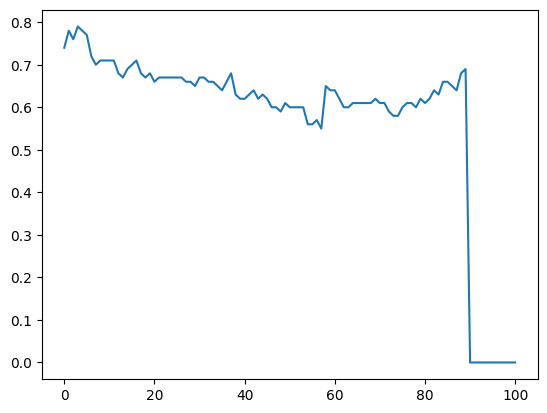

In [9]:
from matplotlib import pyplot as plt

# Import the evaluation task: Data Removal
from valda.eval import data_removal
# Import the evaluation metric: Weighted Accuracy Drop
from valda.metrics import weighted_acc_drop

accs = data_removal(vals, trnX, trnY, tetX, tetY)
plt.plot(range(len(accs)), accs)
res = weighted_acc_drop(accs)
print("The weighted accuracy drop is {:.3f}".format(res))

In [10]:
dv = DataValuation(trnX, trnY, devX, devY)
vals = dv.estimate()
print(vals)

100%|██████████| 100/100 [00:00<00:00, 352.68it/s]

{0: 0.030000000000000027, 1: 0.050000000000000044, 2: 0.06000000000000005, 3: 0.020000000000000018, 4: 0.0, 5: 0.06000000000000005, 6: 0.010000000000000009, 7: 0.020000000000000018, 8: 0.0, 9: 0.020000000000000018, 10: 0.030000000000000027, 11: 0.010000000000000009, 12: 0.010000000000000009, 13: 0.0, 14: 0.010000000000000009, 15: 0.0, 16: 0.06000000000000005, 17: 0.010000000000000009, 18: 0.010000000000000009, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.010000000000000009, 26: 0.0, 27: 0.020000000000000018, 28: 0.0, 29: 0.010000000000000009, 30: 0.0, 31: 0.0, 32: 0.030000000000000027, 33: 0.010000000000000009, 34: 0.040000000000000036, 35: 0.0, 36: 0.0, 37: 0.040000000000000036, 38: 0.040000000000000036, 39: 0.010000000000000009, 40: 0.010000000000000009, 41: 0.010000000000000009, 42: 0.0, 43: 0.030000000000000027, 44: 0.050000000000000044, 45: 0.030000000000000027, 46: 0.020000000000000018, 47: 0.040000000000000036, 48: 0.0, 49: 0.07999999999999996, 50: 0.0, 51: 0.0200

The weighted accuracy drop is 0.200


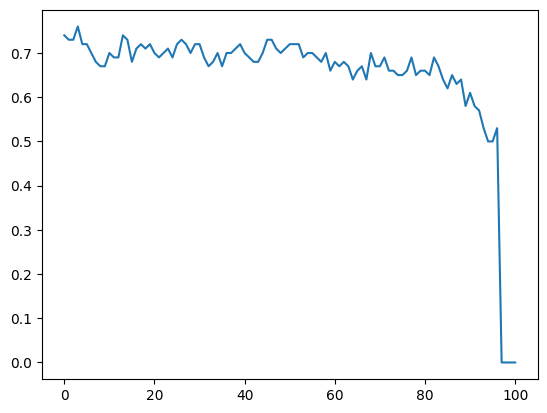

In [11]:
accs = data_removal(vals, trnX, trnY, tetX, tetY)
plt.plot(range(len(accs)), accs)
res = weighted_acc_drop(accs)
print("The weighted accuracy drop is {:.3f}".format(res))

# logistic - tmc

In [3]:
problem, model = 'classification', 'logistic'
hidden_units = [] # Empty list in the case of logistic regression.
train_size = 1000

In [5]:
d, difficulty = 50, 1
num_classes = 2
tol = 0.03
target_accuracy = 0.7
important_dims = 5
clf = return_model(model, solver='liblinear', hidden_units=tuple(hidden_units))
_param = 1.0
for _ in range(100):
    X_raw = np.random.multivariate_normal(mean=np.zeros(d), cov = np.eye(d), 
                                          size=train_size + 5000)
    _, y_raw, _, _ = label_generator(
        problem, X_raw, param = _param,  difficulty = difficulty, important=important_dims)
    clf.fit(X_raw[:train_size], y_raw[:train_size])
    test_acc = clf.score(X_raw[train_size:], y_raw[train_size:])
    if test_acc > target_accuracy:                                                         
        break
    _param *= 1.1
print('Performance using the whole training set = {0:.2f}'.format(test_acc))

Performance using the whole training set = 0.71


In [6]:
devX, devY = X_raw[1000:2000], y_raw[1000:2000]
trnX, trnY = X_raw[:1000], y_raw[:1000]
tetX, tetY = X_raw[2000:], y_raw[2000:]

In [7]:
print(tetX.shape, tetY.shape)

(4000, 50) (4000,)


In [ ]:
import time

In [8]:
from valda.valuation import DataValuation
start_time = time.time()
dv = DataValuation(trnX, trnY, devX, devY)
vals = dv.estimate(method='tmc-shapley', clf=lg)
end_time = time.time()
print(vals)
elapsed_time = end_time - start_time
print("Computation Time: {:.2f} seconds".format(elapsed_time))

100%|██████████| 500/500 [22:54<00:00,  2.75s/it]


{0: 0.0032320000000000014, 1: 0.00039800000000000024, 2: 0.0021200000000000043, 3: 0.0004980000000000009, 4: 0.0016999999999999988, 5: -0.00023599999999999966, 6: 0.00031399999999999945, 7: 0.0019440000000000004, 8: -0.0005400000000000001, 9: 0.0018499999999999994, 10: 0.0005259999999999989, 11: 0.0007859999999999988, 12: 7.199999999999942e-05, 13: -5.1999999999999096e-05, 14: -0.002476000000000003, 15: -2.399999999999875e-05, 16: -0.0013139999999999975, 17: 0.0003499999999999989, 18: -0.0005919999999999989, 19: 0.0013260000000000008, 20: 0.0016200000000000006, 21: 0.001328, 22: 0.0018880000000000017, 23: -0.0003399999999999994, 24: 0.0012620000000000008, 25: 0.0010540000000000013, 26: 0.0008760000000000008, 27: -0.00016400000000000087, 28: -7.20000000000015e-05, 29: 0.0011839999999999995, 30: 0.0005900000000000005, 31: 0.0030079999999999994, 32: 0.0002520000000000006, 33: 0.0013680000000000003, 34: 0.00017200000000000028, 35: 0.0028259999999999965, 36: 0.001912000000000001, 37: 0.0013

The weighted accuracy drop is 0.239


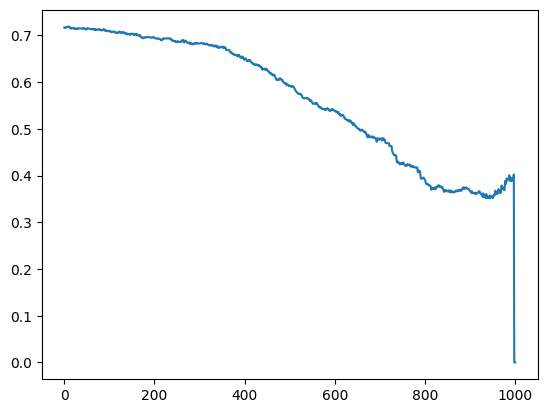

In [9]:
from matplotlib import pyplot as plt

# Import the evaluation task: Data Removal
from valda.eval import data_removal
# Import the evaluation metric: Weighted Accuracy Drop
from valda.metrics import weighted_acc_drop

accs = data_removal(vals, trnX, trnY, tetX, tetY)
plt.plot(range(len(accs)), accs)
res = weighted_acc_drop(accs)
print("The weighted accuracy drop is {:.3f}".format(res))

In [10]:
from valda.valuation import DataValuation
start_time = time.time()
dv = DataValuation(trnX, trnY, devX, devY)
vals = dv.estimate(method='cs-shapley', clf=lg)
end_time = time.time()
print(vals)
elapsed_time = end_time - start_time
print("Computation Time: {:.2f} seconds".format(elapsed_time))

The number of training data with label 0 is 520
Labels on the other side: [1]


100%|██████████| 500/500 [20:59<00:00,  2.52s/it]


score = 0.374
The number of training data with label 1 is 480
Labels on the other side: [0]


100%|██████████| 500/500 [18:33<00:00,  2.23s/it]

score = 0.321
{0: 0.00025431378440371536, 1: 0.0012433639787031918, 2: 0.0010033234696496787, 3: 0.0007170760144580015, 6: 0.00042030789711738946, 7: -5.4224884816587676e-05, 8: 0.0004723602023190289, 9: 0.0003493628667360188, 10: 0.0007059912428646911, 11: 0.0004636713086673277, 13: 0.0007006651871379636, 14: 0.0008010769286898413, 15: 0.0007564327568510835, 17: 0.0005123883238925851, 19: -0.0001369866512509504, 20: 0.0010184854874472477, 21: 0.0007827710234788934, 23: 0.0006843169775707198, 31: 0.00022578639486129577, 33: 0.0011102537983122174, 36: 0.0009398735303082581, 38: 0.0007103046953587405, 39: 0.0004875886904818132, 41: 0.0008389390500677271, 44: 0.0011489210214439334, 46: 0.000795102789868743, 48: 0.0006919393245688557, 49: 0.00028551841518516117, 51: 0.0010294646702078808, 54: 0.0008556303397190423, 55: 0.0004912106634518135, 61: 8.174678327831928e-05, 65: 0.0010870936399581625, 66: 0.0006894534068487543, 68: 0.0006746164499445021, 69: 0.0008733661889290051, 71: 0.000791870

The weighted accuracy drop is 0.245


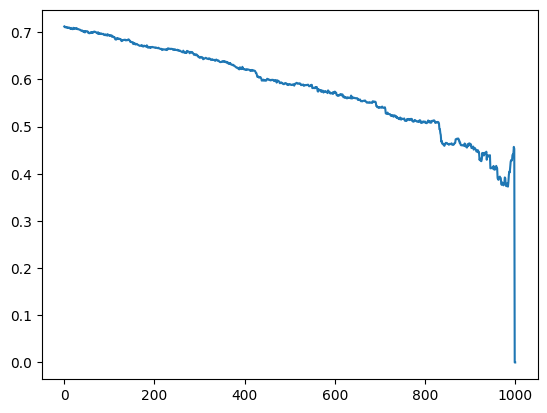

In [11]:
from matplotlib import pyplot as plt

# Import the evaluation task: Data Removal
from valda.eval import data_removal
# Import the evaluation metric: Weighted Accuracy Drop
from valda.metrics import weighted_acc_drop

accs = data_removal(vals, trnX, trnY, tetX, tetY)
plt.plot(range(len(accs)), accs)
res = weighted_acc_drop(accs)
print("The weighted accuracy drop is {:.3f}".format(res))

In [12]:
from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier()
start_time = time.time()
vals = dv.estimate(method='cs-shapley', clf=tree_model)
end_time = time.time()
print(vals)
elapsed_time = end_time - start_time
print("Computation Time: {:.2f} seconds".format(elapsed_time))

The number of training data with label 0 is 520
Labels on the other side: [1]


100%|██████████| 500/500 [1:12:53<00:00,  8.75s/it]


score = 0.333
The number of training data with label 1 is 480
Labels on the other side: [0]


100%|██████████| 500/500 [1:05:23<00:00,  7.85s/it]


score = 0.295
{0: 0.001684800401711824, 1: -0.0003787973632801374, 2: 0.0006364001271534912, 3: 0.0015374121904528422, 6: 0.001438096176291435, 7: 0.001173845841888363, 8: 0.0009608373914293415, 9: 0.00050503095073855, 10: 0.0005544739670349292, 11: 0.0014512564297440417, 13: 0.0006887528568277083, 14: -6.463320194880032e-05, 15: 3.3932108455565958e-06, 17: 0.0014350259716420669, 19: 0.00035556847521755347, 20: 0.0011610690925546593, 21: 0.0007221756274686253, 23: 0.0010470158263781288, 31: 0.0009955413670148588, 33: 0.0006170660802791016, 36: 0.0018071065925963192, 38: 7.272137467355893e-05, 39: 0.001258782898147663, 41: 0.001643627117341273, 44: 0.00029754452463508636, 46: 0.0008089900358007275, 48: 0.0007844163674066392, 49: 1.8669266908239227e-05, 51: 0.0015442311179002196, 54: 0.0005488042782446599, 55: 0.0011249160976078518, 61: 0.001148140815596835, 65: 0.0013415832181554953, 66: 0.00022776989745472017, 68: 0.0014364816967459483, 69: 0.0007435090892752283, 71: 0.0002483811726956

The weighted accuracy drop is 0.157


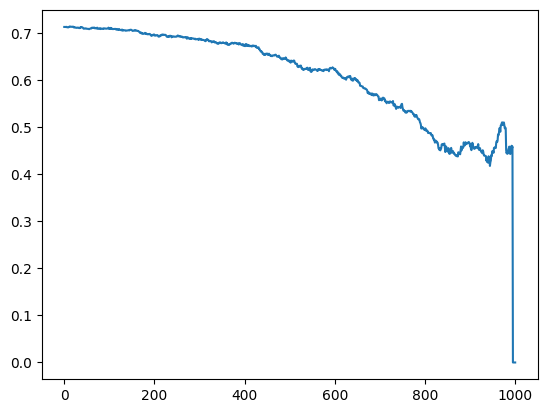

In [13]:
from matplotlib import pyplot as plt

# Import the evaluation task: Data Removal
from valda.eval import data_removal
# Import the evaluation metric: Weighted Accuracy Drop
from valda.metrics import weighted_acc_drop

accs = data_removal(vals, trnX, trnY, tetX, tetY)
plt.plot(range(len(accs)), accs)
res = weighted_acc_drop(accs)
print("The weighted accuracy drop is {:.3f}".format(res))

In [14]:
start_time = time.time()
vals = dv.estimate(method='tmc-shapley', clf=tree_model)
end_time = time.time()
print(vals)
elapsed_time = end_time - start_time
print("Computation Time: {:.2f} seconds".format(elapsed_time))

100%|██████████| 500/500 [03:08<00:00,  2.65it/s]

{0: 0.000808000000000001, 1: 0.0025320000000000004, 2: 0.0003439999999999993, 3: 7.599999999999968e-05, 4: -0.0009359999999999999, 5: 0.0013519999999999997, 6: 0.00023799999999999925, 7: 0.0002660000000000004, 8: 6.000000000000073e-06, 9: 0.0031980000000000008, 10: 7.000000000000029e-05, 11: 0.0004639999999999998, 12: 0.00018800000000000045, 13: 0.0012959999999999996, 14: 0.00023200000000000046, 15: 0.00030800000000000066, 16: -0.001814, 17: 0.0002879999999999997, 18: 0.001612, 19: -0.00015200000000000096, 20: 0.0008120000000000008, 21: 0.0018099999999999993, 22: 0.0005520000000000004, 23: -0.0003279999999999998, 24: 0.0015779999999999985, 25: 3.600000000000046e-05, 26: 0.0011620000000000016, 27: -0.001321999999999998, 28: -0.00010400000000000012, 29: -0.00013999999999999993, 30: -0.0002040000000000006, 31: -0.0011559999999999997, 32: 0.0012979999999999995, 33: 0.0015420000000000024, 34: 8.199999999999908e-05, 35: 0.0008680000000000007, 36: 0.0009299999999999988, 37: 0.0012740000000000

The weighted accuracy drop is 0.187


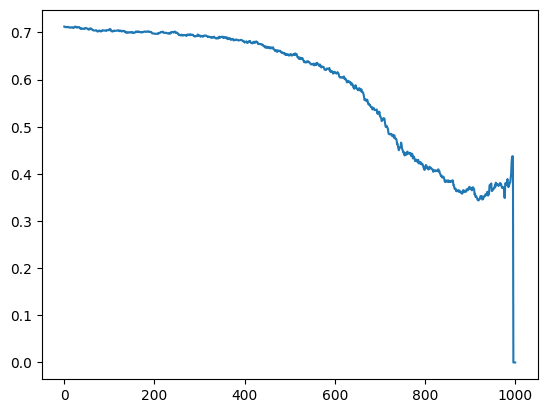

In [15]:
accs = data_removal(vals, trnX, trnY, tetX, tetY)
plt.plot(range(len(accs)), accs)
res = weighted_acc_drop(accs)
print("The weighted accuracy drop is {:.3f}".format(res))

Logistic Regression with PytorchClassifier

In [ ]:
import torch

class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, x):
        outputs = self.softmax(self.linear(x))
        return outputs
from sklearn import preprocessing

labels = list(set(trnY))
le = preprocessing.LabelEncoder()
le.fit(labels)
trnY_num = le.transform(trnY)
devY_num = le.transform(devY)
tstY_num = le.transform(tetY)
from valda.pyclassifier import PytorchClassifier

model = LogisticRegression(input_dim=trnX.shape[1], 
                           output_dim=len(labels))

pt_clf = PytorchClassifier(model, epochs=20, trn_batch_size=16, dev_batch_size=16)
st = time.time()
dv = DataValuation(trnX, trnY_num, devX, devY_num)
vals = dv.estimate(clf=pt_clf, method='tmc-shapley')
fh = time.time()
accs = data_removal(vals, trnX, trnY, tetX, tetY)
elapsed_time = fh - st
print("Computation Time: {:.2f} seconds".format(elapsed_time))
plt.plot(range(len(accs)), accs)
res = weighted_acc_drop(accs)
print("The weighted accuracy drop is {}".format(res))